In [1]:
%config IPCompleter.use_jedi = False
%pdb off
# %load_ext viztracer
# from viztracer import VizTracer
%load_ext autoreload
%autoreload 2
import sys
import traceback # for stack trace formatting
import importlib
from pathlib import Path
from benedict import benedict
import numpy as np


import os

import pandas as pd

# # os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
# os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask
# # os.environ["MODIN_ENGINE"] = "unidist" # Modin will use Unidist
# # os.environ["UNIDIST_BACKEND"] = "mpi" # Unidist will use MPI backend
# import modin.pandas as pd # alternative to pandas which is much faster
# # Installed with `poetry add modin[all]`

# from pandas_profiling import ProfileReport ## for dataframe viewing

# required to enable non-blocking interaction:
%gui qt5

from copy import deepcopy
from numba import jit
import numpy as np
import pandas as pd
from benedict import benedict # https://github.com/fabiocaccamo/python-benedict#usage

# Pho's Formatting Preferences
# from pyphocorehelpers.preferences_helpers import set_pho_preferences, set_pho_preferences_concise, set_pho_preferences_verbose
# set_pho_preferences_concise()

## Pho's Custom Libraries:
from pyphocorehelpers.general_helpers import CodeConversion
from pyphocorehelpers.print_helpers import print_keys_if_possible, print_value_overview_only, document_active_variables, objsize, print_object_memory_usage, debug_dump_object_member_shapes, TypePrintMode
from pyphocorehelpers.print_helpers import get_now_day_str, get_now_time_str, get_now_time_precise_str

# pyPhoPlaceCellAnalysis:
from pyphoplacecellanalysis.General.Pipeline.NeuropyPipeline import NeuropyPipeline # get_neuron_identities

# NeuroPy (Diba Lab Python Repo) Loading
# from neuropy import core
from neuropy.analyses.placefields import PlacefieldComputationParameters
from neuropy.core.epoch import NamedTimerange
from neuropy.core.session.Formats.BaseDataSessionFormats import DataSessionFormatRegistryHolder
from neuropy.core.session.Formats.Specific.BapunDataSessionFormat import BapunDataSessionFormatRegisteredClass
from neuropy.core.session.Formats.Specific.KDibaOldDataSessionFormat import KDibaOldDataSessionFormatRegisteredClass
from neuropy.core.session.Formats.Specific.RachelDataSessionFormat import RachelDataSessionFormat
from neuropy.core.session.Formats.Specific.HiroDataSessionFormat import HiroDataSessionFormatRegisteredClass

## For computation parameters:
from neuropy.analyses.placefields import PlacefieldComputationParameters
from neuropy.utils.dynamic_container import DynamicContainer
from neuropy.utils.result_context import IdentifyingContext
from neuropy.core.session.Formats.BaseDataSessionFormats import find_local_session_paths

# from PendingNotebookCode import _perform_batch_plot, _build_batch_plot_kwargs
from pyphoplacecellanalysis.General.NonInteractiveWrapper import batch_load_session, batch_extended_computations, SessionBatchProgress, batch_programmatic_figures, batch_extended_programmatic_figures
from pyphoplacecellanalysis.General.Pipeline.NeuropyPipeline import PipelineSavingScheme

session_batch_status = {}
session_batch_errors = {}
enable_saving_to_disk = False

global_data_root_parent_path = Path(r'W:\Data') # Windows Apogee
# global_data_root_parent_path = Path(r'/media/MAX/Data') # Diba Lab Workstation Linux
# global_data_root_parent_path = Path(r'/Volumes/MoverNew/data') # rMBP
assert global_data_root_parent_path.exists(), f"global_data_root_parent_path: {global_data_root_parent_path} does not exist! Is the right computer's config commented out above?"

Automatic pdb calling has been turned OFF
build_module_logger(module_name="Spike3D.pipeline"):
	 Module logger com.PhoHale.Spike3D.pipeline has file logging enabled and will log to EXTERNAL\TESTING\Logging\debug_com.PhoHale.Spike3D.pipeline.log


# Load Pipeline

In [2]:
# ==================================================================================================================== #
# Load Data                                                                                                            #
# ==================================================================================================================== #

active_data_mode_name = 'kdiba'

## Data must be pre-processed using the MATLAB script located here: 
#     neuropy/data_session_pre_processing_scripts/KDIBA/IIDataMat_Export_ToPython_2022_08_01.m
# From pre-computed .mat files:

local_session_root_parent_context = IdentifyingContext(format_name=active_data_mode_name) # , animal_name='', configuration_name='one', session_name=self.session_name
local_session_root_parent_path = global_data_root_parent_path.joinpath('KDIBA')

## Animal `gor01`:
local_session_parent_context = local_session_root_parent_context.adding_context(collision_prefix='animal', animal='gor01', exper_name='one') # IdentifyingContext<('kdiba', 'gor01', 'one')>
local_session_parent_path = local_session_root_parent_path.joinpath(local_session_parent_context.animal, local_session_parent_context.exper_name) # 'gor01', 'one'
local_session_paths_list, local_session_names_list =  find_local_session_paths(local_session_parent_path, blacklist=['PhoHelpers', 'Spike3D-Minimal-Test', 'Unused'])

# local_session_parent_context = local_session_root_parent_context.adding_context(collision_prefix='animal', animal='gor01', exper_name='two')
# local_session_parent_path = local_session_root_parent_path.joinpath(local_session_parent_context.animal, local_session_parent_context.exper_name)
# local_session_paths_list, local_session_names_list =  find_local_session_paths(local_session_parent_path, blacklist=[])

### Animal `vvp01`:
# local_session_parent_context = local_session_root_parent_context.adding_context(collision_prefix='animal', animal='vvp01', exper_name='one')
# local_session_parent_path = local_session_root_parent_path.joinpath(local_session_parent_context.animal, local_session_parent_context.exper_name)
# local_session_paths_list, local_session_names_list =  find_local_session_paths(local_session_parent_path, blacklist=[])

# local_session_parent_context = local_session_root_parent_context.adding_context(collision_prefix='animal', animal='vvp01', exper_name='two')
# local_session_parent_path = local_session_root_parent_path.joinpath(local_session_parent_context.animal, local_session_parent_context.exper_name)
# local_session_paths_list, local_session_names_list =  find_local_session_paths(local_session_parent_path, blacklist=[])

# ### Animal `pin01`:
# local_session_parent_context = local_session_root_parent_context.adding_context(collision_prefix='animal', animal='pin01', exper_name='one')
# local_session_parent_path = local_session_root_parent_path.joinpath(local_session_parent_context.animal, local_session_parent_context.exper_name) # no exper_name ('one' or 'two') folders for this animal.
# local_session_paths_list, local_session_names_list =  find_local_session_paths(local_session_parent_path, blacklist=['redundant','showclus','sleep','tmaze'])

## Build session contexts list:
local_session_contexts_list = [local_session_parent_context.adding_context(collision_prefix='sess', session_name=a_name) for a_name in local_session_names_list] # [IdentifyingContext<('kdiba', 'gor01', 'one', '2006-6-07_11-26-53')>, ..., IdentifyingContext<('kdiba', 'gor01', 'one', '2006-6-13_14-42-6')>]

## Initialize `session_batch_status` with the NOT_STARTED status if it doesn't already have a different status
for curr_session_basedir in local_session_paths_list:
    curr_session_status = session_batch_status.get(curr_session_basedir, None)
    if curr_session_status is None:
        session_batch_status[curr_session_basedir] = SessionBatchProgress.NOT_STARTED # set to not started if not present
        # session_batch_status[curr_session_basedir] = SessionBatchProgress.COMPLETED # set to not started if not present

session_batch_status

local_session_names_list: ['2006-6-07_11-26-53', '2006-6-08_14-26-15', '2006-6-09_1-22-43', '2006-6-09_3-23-37', '2006-6-12_15-55-31', '2006-6-13_14-42-6']


{WindowsPath('W:/Data/KDIBA/gor01/one/2006-6-07_11-26-53'): <SessionBatchProgress.NOT_STARTED: 'NOT_STARTED'>,
 WindowsPath('W:/Data/KDIBA/gor01/one/2006-6-08_14-26-15'): <SessionBatchProgress.NOT_STARTED: 'NOT_STARTED'>,
 WindowsPath('W:/Data/KDIBA/gor01/one/2006-6-09_1-22-43'): <SessionBatchProgress.NOT_STARTED: 'NOT_STARTED'>,
 WindowsPath('W:/Data/KDIBA/gor01/one/2006-6-09_3-23-37'): <SessionBatchProgress.NOT_STARTED: 'NOT_STARTED'>,
 WindowsPath('W:/Data/KDIBA/gor01/one/2006-6-12_15-55-31'): <SessionBatchProgress.NOT_STARTED: 'NOT_STARTED'>,
 WindowsPath('W:/Data/KDIBA/gor01/one/2006-6-13_14-42-6'): <SessionBatchProgress.NOT_STARTED: 'NOT_STARTED'>}

In [3]:
%pdb off
# %%viztracer
basedir = local_session_paths_list[1] # NOT 3
print(f'basedir: {str(basedir)}')

# ==================================================================================================================== #
# Load Pipeline                                                                                                        #
# ==================================================================================================================== #
# epoch_name_whitelist = ['maze']
epoch_name_whitelist = None
active_computation_functions_name_whitelist=['_perform_baseline_placefield_computation', '_perform_time_dependent_placefield_computation', '_perform_extended_statistics_computation',
                                        '_perform_position_decoding_computation', 
                                        '_perform_firing_rate_trends_computation',
                                        # '_perform_pf_find_ratemap_peaks_computation',
                                        # '_perform_time_dependent_pf_sequential_surprise_computation'
                                        '_perform_two_step_position_decoding_computation',
                                        # '_perform_recursive_latent_placefield_decoding'
                                    ]
curr_active_pipeline = batch_load_session(global_data_root_parent_path, active_data_mode_name, basedir, epoch_name_whitelist=epoch_name_whitelist,
                                          computation_functions_name_whitelist=active_computation_functions_name_whitelist,
                                          saving_mode=PipelineSavingScheme.SKIP_SAVING, force_reload=True, skip_extended_batch_computations=True, debug_print=False, fail_on_exception=True)

Automatic pdb calling has been turned OFF
basedir: W:\Data\KDIBA\gor01\one\2006-6-08_14-26-15
Skipping loading from pickled file because force_reload == True.
Loading matlab import file results : W:\Data\KDIBA\gor01\one\2006-6-08_14-26-15\2006-6-08_14-26-15.epochs_info.mat... done.
Loading matlab import file results : W:\Data\KDIBA\gor01\one\2006-6-08_14-26-15\2006-6-08_14-26-15.position_info.mat... done.
Loading matlab import file results : W:\Data\KDIBA\gor01\one\2006-6-08_14-26-15\2006-6-08_14-26-15.spikes.mat... 

C:\Users\pho\repos\IsolatedSpike3DEnv\NeuroPy\neuropy\core\session\Formats\SessionSpecifications.py:140: UserWarning: WARNING: Optional File: W:\Data\KDIBA\gor01\one\2006-6-08_14-26-15\2006-6-08_14-26-15.dat does not exist. Continuing without it.
  warnings.warn(f'WARNING: Optional File: {an_optional_filepath} does not exist. Continuing without it.')


done.
Failure loading .position.npy. Must recompute.

Computing linear positions for all active epochs for session... Saving updated position results results : W:\Data\KDIBA\gor01\one\2006-6-08_14-26-15\2006-6-08_14-26-15.position.npy... 2006-6-08_14-26-15.position.npy saved
done.
	 force_recompute is True! Forcing recomputation of .interpolated_spike_positions.npy

Computing interpolate_spike_positions columns results : spikes_df... done.
	 Saving updated interpolated spike position results results : W:\Data\KDIBA\gor01\one\2006-6-08_14-26-15\2006-6-08_14-26-15.interpolated_spike_positions.npy... 2006-6-08_14-26-15.interpolated_spike_positions.npy saved
done.
Loading matlab import file results : W:\Data\KDIBA\gor01\one\2006-6-08_14-26-15\2006-6-08_14-26-15.laps_info.mat... done.
setting laps object.
session.laps loaded successfully!
Loading matlab import file results : W:\Data\KDIBA\gor01\one\2006-6-08_14-26-15\2006-6-08_14-26-15.replay_info.mat... done.
session.replays loaded success

# 2023-02-24 Decoders 
- [ ] where are cells chosen for inclusion in the input of the decoder?

In [ ]:
long_epoch_name, short_epoch_name, global_epoch_name = long_epoch_name, short_epoch_name, global_epoch_name = curr_active_pipeline.find_LongShortGlobal_epoch_names()
long_results, short_results, global_results = [curr_active_pipeline.computation_results[an_epoch_name]['computed_data'] for an_epoch_name in [long_epoch_name, short_epoch_name, global_epoch_name]]

recalculate_anyway = False

In [ ]:
# Make the 1D Placefields and Decoders conform between the long and the short epochs:
long_pf1D = long_results.pf1D
short_pf1D = short_results.pf1D
global_pf1D = global_results.pf1D

# short_pf1D, did_update_bins = short_pf1D.conform_to_position_bins(long_pf1D, force_recompute=True) # not needed because it's done in one_step_decoder_1D.conform_to_position_bins(...)
long_one_step_decoder_1D, short_one_step_decoder_1D  = [results_data.get('pf1D_Decoder', None) for results_data in (long_results, short_results)]
short_one_step_decoder_1D, did_recompute = short_one_step_decoder_1D.conform_to_position_bins(long_one_step_decoder_1D, force_recompute=True)

## Build or get the two-step decoders for both the long and short:
long_two_step_decoder_1D, short_two_step_decoder_1D  = [results_data.get('pf1D_TwoStepDecoder', None) for results_data in (long_results, short_results)]
if recalculate_anyway or did_recompute or (long_two_step_decoder_1D is None) or (short_two_step_decoder_1D is None):
    curr_active_pipeline.perform_specific_computation(computation_functions_name_whitelist=['_perform_two_step_position_decoding_computation'], computation_kwargs_list=[dict(ndim=1)], enabled_filter_names=[long_epoch_name, short_epoch_name], fail_on_exception=True, debug_print=True)
    long_two_step_decoder_1D, short_two_step_decoder_1D  = [results_data.get('pf1D_TwoStepDecoder', None) for results_data in (long_results, short_results)]
    assert (long_two_step_decoder_1D is not None and short_two_step_decoder_1D is not None)

decoding_time_bin_size = long_one_step_decoder_1D.time_bin_size # 1.0/30.0 # 0.03333333333333333
# decoding_time_bin_size = 0.03 # 0.03333333333333333
print(f'decoding_time_bin_size: {decoding_time_bin_size}')

#### Get 2D Decoders for validation and comparisons:

In [ ]:
# Make the 2D Placefields and Decoders conform between the long and the short epochs:
long_pf2D = long_results.pf2D
short_pf2D = short_results.pf2D
global_pf2D = global_results.pf2D

# long_one_step_decoder_2D, short_one_step_decoder_2D  = [results_data.get('pf2D_Decoder', None) for results_data in (long_results, short_results)]
# long_two_step_decoder_2D, short_two_step_decoder_2D  = [results_data.get('pf2D_TwoStepDecoder', None) for results_data in (long_results, short_results)]

# short_pf2D, did_update_bins = short_pf2D.conform_to_position_bins(long_pf2D)
long_one_step_decoder_2D, short_one_step_decoder_2D  = [results_data.get('pf2D_Decoder', None) for results_data in (long_results, short_results)]
short_one_step_decoder_2D, did_recompute = short_one_step_decoder_2D.conform_to_position_bins(long_one_step_decoder_2D)

## Build or get the two-step decoders for both the long and short:
long_two_step_decoder_2D, short_two_step_decoder_2D  = [results_data.get('pf2D_TwoStepDecoder', None) for results_data in (long_results, short_results)]
if recalculate_anyway or did_recompute or (long_two_step_decoder_2D is None) or (short_two_step_decoder_2D is None):
    curr_active_pipeline.perform_specific_computation(computation_functions_name_whitelist=['_perform_two_step_position_decoding_computation'], computation_kwargs_list=[dict(ndim=1)], enabled_filter_names=[long_epoch_name, short_epoch_name], fail_on_exception=True, debug_print=True)
    long_two_step_decoder_2D, short_two_step_decoder_2D  = [results_data.get('pf2D_TwoStepDecoder', None) for results_data in (long_results, short_results)]
    assert (long_two_step_decoder_2D is not None and short_two_step_decoder_2D is not None)

In [ ]:
# Sums are similar:
print(f'{np.sum(long_one_step_decoder_2D.marginal.x.p_x_given_n) =},\t {np.sum(long_one_step_decoder_1D.p_x_given_n) = }') # 31181.999999999996 vs 31181.99999999999

## Validate:
assert long_one_step_decoder_2D.marginal.x.p_x_given_n.shape == long_one_step_decoder_1D.p_x_given_n.shape, f"Must equal but: {long_one_step_decoder_2D.marginal.x.p_x_given_n.shape =} and {long_one_step_decoder_1D.p_x_given_n.shape =}"
assert long_one_step_decoder_2D.marginal.x.most_likely_positions_1D.shape == long_one_step_decoder_1D.most_likely_positions.shape, f"Must equal but: {long_one_step_decoder_2D.marginal.x.most_likely_positions_1D.shape =} and {long_one_step_decoder_1D.most_likely_positions.shape =}"

## validate values:
assert np.allclose(long_one_step_decoder_2D.marginal.x.p_x_given_n, long_one_step_decoder_1D.p_x_given_n), f"1D Decoder should have an x-posterior equal to its own posterior"
assert np.allclose(curr_epoch_result['marginal_x']['most_likely_positions_1D'], curr_epoch_result['most_likely_positions']), f"1D Decoder should have an x-posterior with most_likely_positions_1D equal to its own most_likely_positions"

In [ ]:
# Gate the spikes that are coming in to build the decoder... those are from the placefields actually.
    # so it'll be gating the placefield cells.
    
active_config_name = 'maze1'
active_pf_1D = long_pf1D
# curr_active_pipeline.computation_results['maze'].

# Testing Placefields:

In [4]:
import matplotlib.pyplot as plt
%matplotlib qt

from neuropy.utils.misc import split_list_of_dicts
from neuropy.analyses.placefields import PlacefieldComputationParameters
from neuropy.analyses.placefields import PfND
from neuropy.utils.debug_helpers import debug_print_placefield, debug_print_subsession_neuron_differences, debug_print_ratemap, debug_print_spike_counts, debug_plot_2d_binning, print_aligned_columns
from neuropy.utils.debug_helpers import parameter_sweeps, _plot_parameter_sweep, compare_placefields_info

def _compute_parameter_sweep(spikes_df, active_pos, all_param_sweep_options: dict) -> dict:
    """ Computes the PfNDs for all the swept parameters (combinations of grid_bin, smooth, etc)
    
    Usage:
        smooth_options = [(None, None), (0.5, 0.5), (1.0, 1.0), (2.0, 2.0), (5.0, 5.0)]
        grid_bin_options = [(1,1),(5,5),(10,10)]
        all_param_sweep_options = cartesian_product(smooth_options, grid_bin_options)
        param_sweep_option_n_values = dict(smooth=len(smooth_options), grid_bin=len(grid_bin_options)) 
        output_pfs = _compute_parameter_sweep(spikes_df, active_pos, all_param_sweep_options)

    """
    output_pfs = {} # empty dict

    for a_sweep_dict in all_param_sweep_options:
        a_sweep_tuple = frozenset(a_sweep_dict.items())
        output_pfs[a_sweep_tuple] = PfND(deepcopy(spikes_df).spikes.sliced_by_neuron_type('pyramidal'), deepcopy(active_pos.linear_pos_obj), **a_sweep_dict) # grid_bin=, etc
        
    return output_pfs

C:\Users\pho\repos\IsolatedSpike3DEnv\NeuroPy\neuropy\core\flattened_spiketrains.py:23: UserWarning: registration of accessor <class 'neuropy.core.flattened_spiketrains.SpikesAccessor'> under name 'spikes' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class SpikesAccessor(TimeSlicedMixin):


In [ ]:
## Test that changing the position bins post-hoc is equivalent to initially computing with those position bins

## Get testing variables from `curr_active_pipeline`

In [ ]:
spikes_df = curr_active_pipeline.sess.spikes_df
active_pos = curr_active_pipeline.sess.position

## Save for NeuroPy testing:
finalized_output_cache_file='../NeuroPy/tests/neuropy_pf_testing.h5'
sess_identifier_key='sess'
spikes_df.to_hdf(finalized_output_cache_file, key=f'{sess_identifier_key}/spikes_df')
active_pos.to_dataframe().to_hdf(finalized_output_cache_file, key=f'{sess_identifier_key}/pos_df', format='table')

## Load testing variables from file 'NeuroPy/tests/neuropy_pf_testing.h5'

In [8]:
""" Corresponding load for Neuropy Testing file 'NeuroPy/tests/neuropy_pf_testing.h5': 
    ## Save for NeuroPy testing:
    finalized_output_cache_file='../NeuroPy/tests/neuropy_pf_testing.h5'
    sess_identifier_key='sess'
    spikes_df.to_hdf(finalized_output_cache_file, key=f'{sess_identifier_key}/spikes_df')
    active_pos.to_dataframe().to_hdf(finalized_output_cache_file, key=f'{sess_identifier_key}/pos_df', format='table')
"""
finalized_output_cache_file='../NeuroPy/tests/neuropy_pf_testing.h5'
sess_identifier_key='sess'
# Load the saved .h5 spikes_df and active_pos dataframes for testing:
spikes_df = pd.read_hdf(finalized_output_cache_file, key=f'{sess_identifier_key}/spikes_df')
pyramidal_only_spikes_df = deepcopy(spikes_df).spikes.sliced_by_neuron_type('pyramidal') ## get only the pyramidal spikes

active_pos_df = pd.read_hdf(finalized_output_cache_file, key=f'{sess_identifier_key}/pos_df')
active_pos = active_pos_df.position.to_Position_obj() # convert back to a full position object

## Conduct Parameter Sweeps

In [ ]:
# smooth_options = [(None, None), (0.5, 0.5), (1.0, 1.0), (2.0, 2.0), (5.0, 5.0)]
# grid_bin_options = [(1,1),(5,5),(10,10)]
# grid_bin_options = [(5,5)]
# param_sweep_option_n_values = dict(smooth=len(smooth_options), grid_bin=len(grid_bin_options)) 

smooth_options = [(None, None), (0.5, 0.5), (1.0, 1.0)]
grid_bin_options = [(0.5, 0.5), (1.0, 1.0), (2.0, 2.0), (5.0, 5.0)]
all_param_sweep_options, param_sweep_option_n_values = parameter_sweeps(smooth=smooth_options, grid_bin=grid_bin_options)
output_pfs = _compute_parameter_sweep(spikes_df, active_pos, all_param_sweep_options)

In [ ]:
speed_thresh_options = [0.0, 1.0, 25.0, 50.0, 100.0, 200.0]
all_param_sweep_options, param_sweep_option_n_values = parameter_sweeps(speed_thresh=speed_thresh_options)
output_pfs = _compute_parameter_sweep(spikes_df, active_pos, all_param_sweep_options)
print_aligned_columns(['speed_thresh', 'num_good_neurons', 'num_total_spikes'], [speed_thresh_options, num_good_placefield_neurons_list, num_total_spikes_list])

In [ ]:
frate_thresh_options = [0.0, 0.1, 1.0, 5.0, 10.0, 100.0]
all_param_sweep_options, param_sweep_option_n_values = parameter_sweeps(frate_thresh=frate_thresh_options)
output_pfs = _compute_parameter_sweep(spikes_df, active_pos, all_param_sweep_options)
print_aligned_columns(['frate_thresh', 'num_good_neurons', 'num_total_spikes'], [frate_thresh_options, num_good_placefield_neurons_list, num_total_spikes_list])

In [ ]:
fig, axs = _plot_parameter_sweep(output_pfs, param_sweep_option_n_values)

In [ ]:
active_config.computation_config = PlacefieldComputationParameters(speed_thresh=0.0, grid_bin=(5, 3), smooth=(0.0, 0.0), frate_thresh=0.1) # TODO: FIXME: BUG: when frate_thresh=0.0, there are 0 good placefield_neuronIDs for all computations!

In [ ]:
## PfND_TimeDependent Parameter Sweeps:

In [ ]:
from neuropy.analyses.time_dependent_placefields import PfND_TimeDependent, PlacefieldSnapshot

# PfND_TimeDependent
orginal_pf1D_dt = PfND_TimeDependent(deepcopy(spikes_df).spikes.sliced_by_neuron_type('pyramidal'), deepcopy(active_pos.linear_pos_obj), frate_thresh=0.0)
orginal_pf1D_dt

# 2023-03-03 - Decoder Testing
Useful Decoder-related plotting and visuzliation classes:
```python
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import plot_decoded_epoch_slices
```

In [6]:
%load_ext viztracer
from viztracer import VizTracer

In [9]:
from pyphoplacecellanalysis.Analysis.Decoder.reconstruction import BayesianPlacemapPositionDecoder

with VizTracer(output_file=f"viztracer_{get_now_time_str()}-build_new_PfND.json", min_duration=200, tracer_entries=3000000, ignore_frozen=True) as tracer:
    ## Build placefield for the decoder to use:
    original_pf1D = PfND(deepcopy(pyramidal_only_spikes_df), deepcopy(active_pos.linear_pos_obj), frate_thresh=0.0) # all other settings default

    new_decoder_pf_params = deepcopy(original_pf1D.config) # should be a PlacefieldComputationParameters
    # override some settings before computation:
    new_decoder_pf_params.time_bin_size = 0.1

    ## 1D Decoder
    new_decoder_pf1D = original_pf1D
    new_1D_decoder_spikes_df = new_decoder_pf1D.filtered_spikes_df.copy()

    # Why would it need both the pf1D and the spikes? Doesn't the pf1D include the spikes (and determine the placefields, which are all that are used)???
    new_1D_decoder = BayesianPlacemapPositionDecoder(new_decoder_pf_params.time_bin_size, new_decoder_pf1D, new_1D_decoder_spikes_df, debug_print=False)
    new_1D_decoder.compute_all()

    print(f'done!')

done!
Total Entries: 2788                                                             
Use the following command to open the report:
vizviewer C:\Users\pho\repos\IsolatedSpike3DEnv\Spike3D\viztracer_2023-03-03_11-03-build_new_PfND.json


In [ ]:
new_1D_decoder.time_bin_size

In [ ]:
original_decoder = new_1D_decoder # strangely this makes original_pf.included_neuron_IDs wrapped in an extra list!
original_neuron_ids = np.array(original_decoder.pf.ratemap.neuron_ids) # original_pf.included_neuron_IDs
subset_included_neuron_IDXs = np.arange(10) # only get the first 10 neuron_ids
subset_included_neuron_ids = original_neuron_ids[subset_included_neuron_IDXs] # only get the first 10 neuron_ids
print(f'{original_neuron_ids = }\n{subset_included_neuron_ids = }')
neuron_sliced_1D_decoder = original_decoder.get_by_id(subset_included_neuron_ids)

In [ ]:
neuron_sliced_1D_decoder.neuron_IDXs

In [ ]:
PfND
get_by_id()

## Specific Epoch Decoding:

In [30]:
from pyphoplacecellanalysis.General.Pipeline.Stages.DisplayFunctions.DecoderPredictionError import plot_decoded_epoch_slices

In [31]:
## Lap-Epochs Decoding:
sess = curr_active_pipeline.sess
active_decoder = new_1D_decoder
decoding_time_bin_size = 0.02
global_pos_df = sess.position.to_dataframe()

laps_copy = deepcopy(sess.laps)
laps_filter_epochs = laps_copy.filtered_by_lap_flat_index(np.arange(6)).as_epoch_obj() # epoch object
laps_filter_epochs_decoder_result = active_decoder.decode_specific_epochs(sess.spikes_df, filter_epochs=laps_filter_epochs, decoding_time_bin_size=decoding_time_bin_size, debug_print=False)
laps_filter_epochs_decoder_result.epoch_description_list = [f'lap[{epoch_tuple.lap_id}]' for epoch_tuple in laps_filter_epochs.to_dataframe()[['lap_id']].itertuples()] # Short

In [17]:
laps_filter_epochs_decoder_result

In [18]:
active_decoder.xbin

In [27]:
(np.min(active_decoder.xbin), np.max(active_decoder.xbin))
# np.ptp(active_decoder.xbin)

(-87.9073492480395, 151.0926507519605)

In [25]:
global_pos_df['lin_pos'].values

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
#  global_pos_df['lin_pos'] lines up with the active_decoder.xbins: (-87.9073492480395, 150.67256643126836) || (-87.9073492480395, 151.0926507519605)
_temp_active_pos_arr = global_pos_df['lin_pos'].values
(np.nanmin(_temp_active_pos_arr), np.nanmax(_temp_active_pos_arr))
# global_pos_df['x'] on the other hand is a VERY BAD MATCH: (22.736279243974774, 261.696733348342)
_temp_active_pos_arr = global_pos_df['x'].values
(np.nanmin(_temp_active_pos_arr), np.nanmax(_temp_active_pos_arr))

(-87.9073492480395, 150.67256643126836)

In [32]:
laps_plot_tuple = plot_decoded_epoch_slices(laps_filter_epochs, laps_filter_epochs_decoder_result, global_pos_df=global_pos_df, variable_name='lin_pos', xbin=active_decoder.xbin,
                                                        name='stacked_epoch_slices_matplotlib_subplots_LAPS', debug_print=True)

In [48]:
# create legend object and add to figure
last_axes = list(laps_plot_tuple[2].axs)[-1]
last_axes.legend()

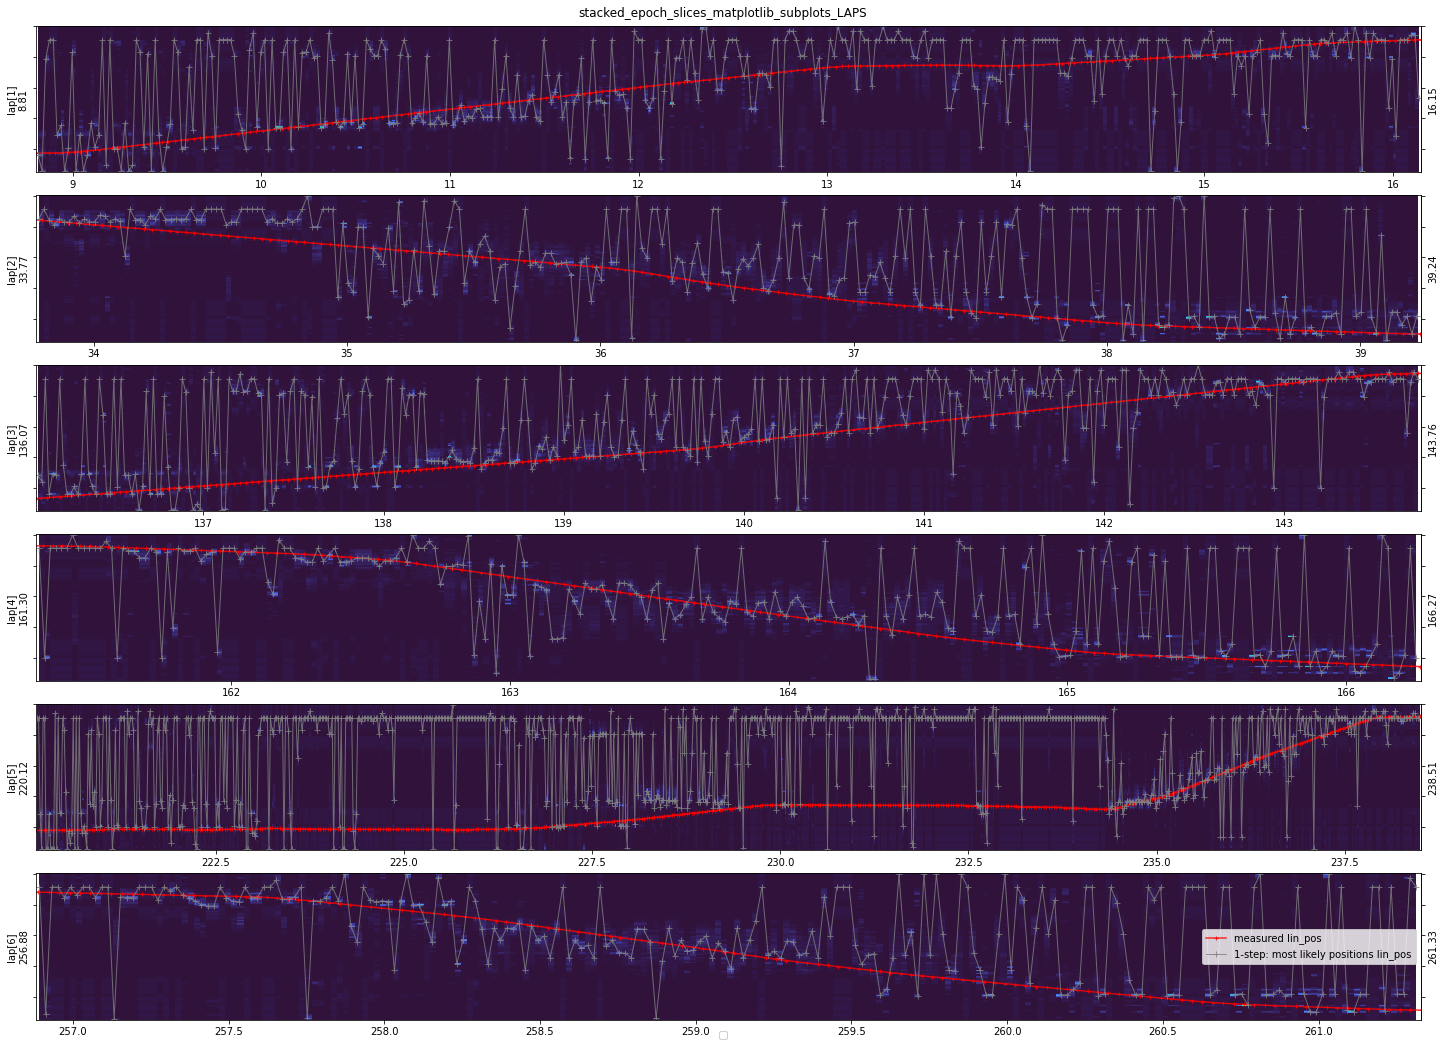

In [50]:
laps_plot_tuple[2].fig

In [45]:
out_legend = laps_plot_tuple[2].fig.legend(handles=list(laps_plot_tuple[2].axs), labels=[p.get_label() for p in list(laps_plot_tuple[2].axs)], loc='lower center', ncol=4) #
out_legend

C:\Users\pho\AppData\Local\Temp\ipykernel_22132\3653236813.py:1: UserWarning: Legend does not support handles for Axes instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  out_legend = laps_plot_tuple[2].fig.legend(handles=list(laps_plot_tuple[2].axs), labels=[p.get_label() for p in list(laps_plot_tuple[2].axs)], loc='lower center', ncol=4) #


## "Leave-one-out" decoding:

In [ ]:
def _compute_leave_one_out_decoding(original_decoder):
    """ "Leave-one-out" decoding
    WARNING: this might suck up a ton of memory! 
    """
    try:
        from tqdm import tqdm
    except ImportError:
        tqdm = lambda x: x # NO-OP alternative to tqdm progress bar when not using tqdm

    original_neuron_ids = np.array(original_decoder.pf.ratemap.neuron_ids) # original_pf.included_neuron_IDs
    one_left_out_decoder_dict = {}
    for i, aclu_to_omit in enumerate(original_neuron_ids):
        subset_included_neuron_ids = np.array([aclu for aclu in original_neuron_ids if aclu != aclu_to_omit]) # get all but the omitted neuron
        one_left_out_decoder_dict[aclu_to_omit] = original_decoder.get_by_id(subset_included_neuron_ids)
        
    return one_left_out_decoder_dict


## Build placefield for the decoder to use:
original_decoder_pf1D = PfND(deepcopy(self.spikes_df).spikes.sliced_by_neuron_type('pyramidal'), deepcopy(self.active_pos.linear_pos_obj), frate_thresh=0.0) # all other settings default
## Build the new decoder with custom params:
new_decoder_pf_params = deepcopy(original_decoder_pf1D.config) # should be a PlacefieldComputationParameters
new_decoder_pf_params.time_bin_size = 0.1
original_1D_decoder = BayesianPlacemapPositionDecoder(new_decoder_pf_params.time_bin_size, original_decoder_pf1D, original_decoder_pf1D.filtered_spikes_df.copy(), debug_print=False)
original_1D_decoder.compute_all()

one_left_out_decoder_dict = _compute_leave_one_out_decoding(original_decoder)

In [ ]:
from pyphocorehelpers.print_helpers import print_object_memory_usage

# len(one_left_out_decoder_dict) # 70
print_object_memory_usage(one_left_out_decoder_dict) # object size: 12696.855616 MB

In [ ]:
## cache the one-left-out decoder dict:
import dill

dill.

In [ ]:
first_decoder = list(one_left_out_decoder_dict.values())[0]

In [ ]:
first_decoder.decode_specific_epochs(spikes_df=

In [ ]:
first_decoder.save()

In [ ]:
# _perform_specific_epochs_decoding

# 2023-02-27 - Test whether conform to active position works

In [ ]:
## Generate Placefields with varying bin-sizes:
### Here we use frate_thresh=0.0 which ensures that differently binned ratemaps don't have different numbers of spikes or cells.
smooth_options = [(None, None)]
grid_bin_options = [(0.5, 0.5), (1.0, 1.0), (2.0, 2.0), (5.0, 5.0)]
all_param_sweep_options, param_sweep_option_n_values = parameter_sweeps(grid_bin=grid_bin_options, smooth=smooth_options, frate_thresh=[0.0])
output_pfs = _compute_parameter_sweep(spikes_df, active_pos, all_param_sweep_options)

In [ ]:
num_good_placefield_neurons_list, num_total_spikes_list, num_spikes_per_spiketrain_list = compare_placefields_info(output_pfs)
print_aligned_columns(['grid_bin x smooth', 'num_good_neurons', 'num_total_spikes'], 
                     [all_param_sweep_options, num_good_placefield_neurons_list, num_total_spikes_list], enable_checking_all_values_width=True)

In [ ]:
fig, axs = _plot_parameter_sweep(output_pfs, param_sweep_option_n_values, debug_print=True)

In [ ]:
output_pfs

In [ ]:
param_sweep_option_n_values

In [ ]:
fine_binned_pf = list(output_pfs.values())[0]
coarse_binned_pf = list(output_pfs.values())[-1]

print(f'{coarse_binned_pf.bin_info = }\n{fine_binned_pf.bin_info = }')

In [ ]:
fine_binned_pf.bin_info

In [ ]:
coarse_binned_pf.bin_info

In [ ]:
rebinned_fine_binned_pf = deepcopy(fine_binned_pf)
rebinned_fine_binned_pf.conform_to_position_bins(target_pf1D=coarse_binned_pf, force_recompute=True)
assert rebinned_fine_binned_pf.bin_info == coarse_binned_pf.bin_info # the bins must be equal after conforming

num_good_placefield_neurons_list, num_total_spikes_list, num_spikes_per_spiketrain_list = compare_placefields_info(dict(zip(['coarse', 'original', 'rebinned'],[coarse_binned_pf, fine_binned_pf, rebinned_fine_binned_pf])))
print_aligned_columns(['pf', 'num_good_neurons', 'num_total_spikes'], [['coarse', 'original', 'rebinned'], num_good_placefield_neurons_list, num_total_spikes_list], enable_checking_all_values_width=True)

assert num_good_placefield_neurons_list[0] == num_good_placefield_neurons_list[-1] # require the rebinned pf to have the same number of good neurons as the one that it conformed to
assert num_total_spikes_list[0] == num_total_spikes_list[-1] # require the rebinned pf to have the same number of total spikes as the one that it conformed to
# assert num_spikes_per_spiketrain_list[0] == num_spikes_per_spiketrain_list[-1] # require the rebinned pf to have the same number of spikes in each spiketrain as the one that it conformed to

In [ ]:
## TODO 2023-03-02: plot the three placefields next to each other horizontally (as a single row for comparison):
fig, axs = _plot_parameter_sweep(dict(zip([frozenset({'pf':'coarse'}), frozenset({'pf':'original'}), frozenset({'pf':'rebinned'})],[coarse_binned_pf, fine_binned_pf, rebinned_fine_binned_pf])), {'pf':3}, debug_print=True)

In [ ]:
# Test excluding certain neurons from the placefield
original_pf = fine_binned_pf
original_pf_neuron_ids = original_pf.included_neuron_IDs.copy()
subset_included_neuron_IDXs = np.arange(10) # only get the first 10 neuron_ids
subset_included_neuron_ids = original_pf_neuron_ids[subset_included_neuron_IDXs] # only get the first 10 neuron_ids
print(f'{original_pf_neuron_ids = }\n{subset_included_neuron_ids = }')
neuron_sliced_pf = deepcopy(fine_binned_pf)
neuron_sliced_pf = neuron_sliced_pf.get_by_id(subset_included_neuron_ids)
neuron_sliced_pf_neuron_ids = neuron_sliced_pf.included_neuron_IDs
print(f'{neuron_sliced_pf_neuron_ids = }')

assert np.all(neuron_sliced_pf_neuron_ids == subset_included_neuron_ids) # ensure that the returned neuron ids actually equal the desired subset
assert np.all(np.array(neuron_sliced_pf.ratemap.neuron_ids) == subset_included_neuron_ids) # ensure that the ratemap neuron ids actually equal the desired subset
assert len(neuron_sliced_pf.ratemap.tuning_curves) == len(subset_included_neuron_ids) # ensure one output tuning curve for each neuron_id
np.all(np.isclose(neuron_sliced_pf.ratemap.tuning_curves, [original_pf.ratemap.tuning_curves[idx] for idx in subset_included_neuron_IDXs])) # ensure that the tuning curves built for the neuron_slided_pf are the same as those subset as retrieved from the  original_pf

In [ ]:
# neuron_sliced_pf.cell_ids

In [ ]:
neuron_sliced_pf.ratemap.tuning_curves

In [ ]:
original_pf.plot_ratemaps_1D()

In [ ]:
neuron_sliced_pf.plot_ratemaps_1D()

In [ ]:
# TODO: Test selecting non-existant neuron_ids for inclusion:


## Overflow:

In [ ]:
# all spikes:
active_epoch_placefields1Da = PfND(deepcopy(spikes_df), deepcopy(active_pos.linear_pos_obj), grid_bin=(1,1)) # 

In [ ]:
# pyramidal spikes only:
active_epoch_placefields1Db = PfND(deepcopy(spikes_df).spikes.sliced_by_neuron_type('pyramidal'), deepcopy(active_pos.linear_pos_obj), grid_bin=(1,1)) # grid_bin=, etc

In [ ]:
# PlacefieldComputationParameters
# Parameter sweeps:

# grid_bin = [(1.0, 1.0)]

# 10.0
cls.compute_position_grid_bin_size(sess.position.x, sess.position.y, num_bins=(64, 64)